In [9]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def make_df(filename, ID, slicing = 0):
    df = pd.read_csv(filename)
    if slicing:
        l = len(df)
        df = df.head(slicing)
        print(f'sliced into {len(df)} out of {l} data.')
    df.rename(columns={'Date' : 'ds' , 'S' : 'y'}, inplace = True)
    df['ds'] = pd.to_datetime(df['ds'])
    df.set_index('ds', inplace = True)
    df_daily = df.resample('D').mean()
    df_daily['H'].fillna(method='ffill', inplace = True)
    df = df_daily.reset_index()
    df['ID'] = ID
    df = df[['ds','y','H','ID']]
    
    return df

In [4]:
# 298 기간

df1 = make_df('H-S_seq_1.csv',ID = 'data1')
df2 = make_df('H-S_seq_2.csv',ID = 'data2')
df3 = make_df('H-S_seq_3.csv',ID = 'data3')
df4 = make_df('H-S_seq_4.csv',ID = 'data4')
df5 = make_df('H-S_seq_5.csv',ID = 'data5')
df6 = make_df('H-S_seq_6.csv',ID = 'data6')
df7 = make_df('H-S_seq_7.csv',ID = 'data7')
df8 = make_df('H-S_seq_8.csv',ID = 'data8')
df1_test = make_df('H-S_seq_1.csv',ID = 'data1', slicing = 5)
df2_test = make_df('H-S_seq_2.csv',ID = 'data2', slicing = 5)

df = pd.concat((df3,df4,df5,df6,df7,df8))

sliced into 5 out of 62 data.
sliced into 5 out of 62 data.


In [5]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 30)
df1

,ds,y,H,ID
0,2021-08-06,0.000,0.000,data1
1,2021-08-07,NaN,0.000,data1
2,2021-08-08,NaN,0.000,data1
3,2021-08-09,NaN,0.000,data1
4,2021-08-10,NaN,0.000,data1
...,...,...,...,...
293,2022-05-26,NaN,4.464,data1
294,2022-05-27,54.932,4.464,data1
295,2022-05-28,NaN,4.464,data1
296,2022-05-29,NaN,4.464,data1


In [6]:
m = NeuralProphet(learning_rate=0.1, 
                  yearly_seasonality=False, 
                  weekly_seasonality=False, 
                  unknown_data_normalization=True, 
                  newer_samples_weight = 4,
                  n_forecasts=10)

m = m.add_future_regressor(name='H', normalize=True)
# metrics = m.fit(df,freq='D')
metrics = m.fit(df)

WARNING - (NP.forecaster.fit) - Changing n_forecasts to 1. Without lags, the forecast can be computed for any future time, independent of lagged values
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe 

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,ID,residual1,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,0.000,data4,1.128456,1.128456,1.128456,0.000000,0.000000
1,2021-08-07,NaN,data4,NaN,1.493375,1.493375,0.000000,0.000000
2,2021-08-08,NaN,data4,NaN,1.858294,1.858294,0.000000,0.000000
3,2021-08-09,NaN,data4,NaN,2.223214,2.223214,0.000000,0.000000
4,2021-08-10,NaN,data4,NaN,2.588133,2.588133,0.000000,0.000000
...,...,...,...,...,...,...,...,...
293,2022-05-26,NaN,data4,NaN,57.344471,55.180401,2.164073,2.164073
294,2022-05-27,57.412,data4,-0.052762,57.359238,55.195164,2.164073,2.164073
295,2022-05-28,NaN,data4,NaN,57.374001,55.209927,2.164073,2.164073
296,2022-05-29,NaN,data4,NaN,57.388767,55.224693,2.164073,2.164073


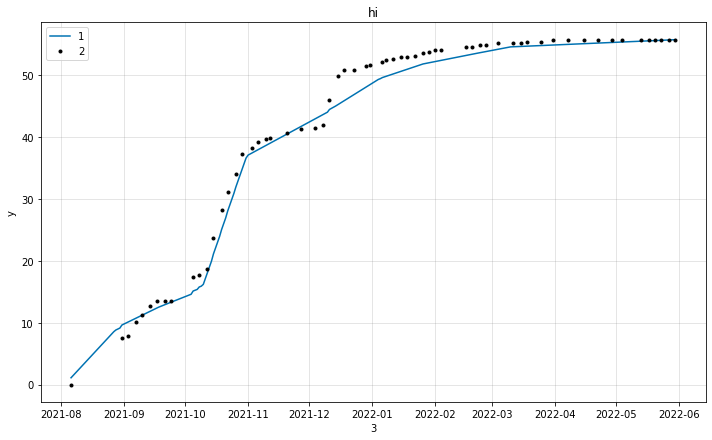

In [16]:
forecast3 = m.predict(df3)
forecast4 = m.predict(df4)
m.plot(forecast3, xlabel='3', plotting_backend='matplotlib')
# m.plot(forecast4, xlabel='4')
plt.title('hi')
plt.legend(['1','2'])

forecast4

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,ID,residual1,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,0.000,data1,1.121145,1.121145,1.121145,0.000000,0.000000
1,2021-08-07,NaN,data1,NaN,1.483699,1.483699,0.000000,0.000000
2,2021-08-08,NaN,data1,NaN,1.846254,1.846254,0.000000,0.000000
3,2021-08-09,NaN,data1,NaN,2.208809,2.208809,0.000000,0.000000
4,2021-08-10,NaN,data1,NaN,2.571363,2.571363,0.000000,0.000000
...,...,...,...,...,...,...,...,...
293,2022-05-26,NaN,data1,NaN,57.241665,54.822861,2.418808,2.418808
294,2022-05-27,54.932,data1,2.324340,57.256340,54.837532,2.418808,2.418808
295,2022-05-28,NaN,data1,NaN,57.271008,54.852200,2.418808,2.418808
296,2022-05-29,NaN,data1,NaN,57.285675,54.866867,2.418808,2.418808


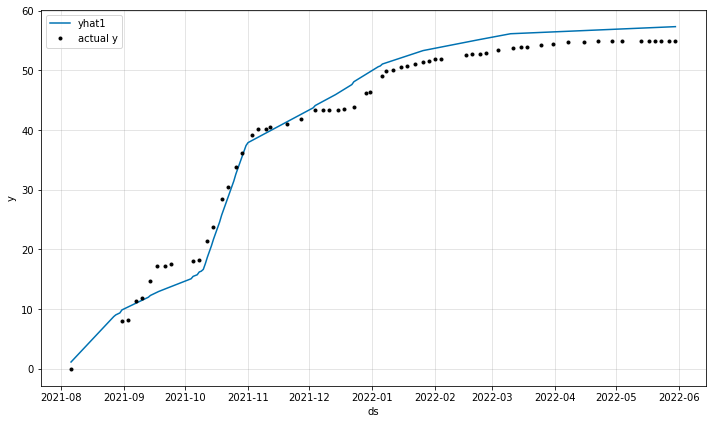

In [8]:
forecast1 = m.predict(df1)
m.plot(forecast1)

forecast1